
KOLKATA AIRPORT FLIGHT DATA ANALYSIS

⏳ Loading data files...
✓ Monthly Domestic Flights Data - 2015.csv (316 records)
✓ Monthly Domestic Flights Data - 2016.csv (432 records)
✓ Monthly Domestic Flights Data - 2017.csv (462 records)
✓ Monthly Domestic Flights Data - 2018.csv (500 records)
✓ Monthly Domestic Flights Data - 2019.csv (554 records)
✓ Monthly Domestic Flights Data - 2020.csv (440 records)
✓ Monthly Domestic Flights Data - 2021.csv (507 records)
✓ Monthly Domestic Flights Data - 2022.csv (590 records)
✓ Monthly Domestic Flights Data - 2023.csv (604 records)

✅ Successfully loaded 4,405 total records

Columns in your data:
['_Id', 'Year', 'Month', 'Origin', 'Dest', 'Pax From Origin', 'Pax To Origin', 'Freight From Origin', 'Frieght To Origin', 'Mail From Origin', 'Mail To Origin']

🧹 Cleaning data...
🔄 Cleaned dataset contains 4,405 records

📊 Analyzing data...

💾 Saved visualization: flight_analysis_output/kolkata_analysis.png

📈 Statistical Summary:
     Pax_From_Origin   

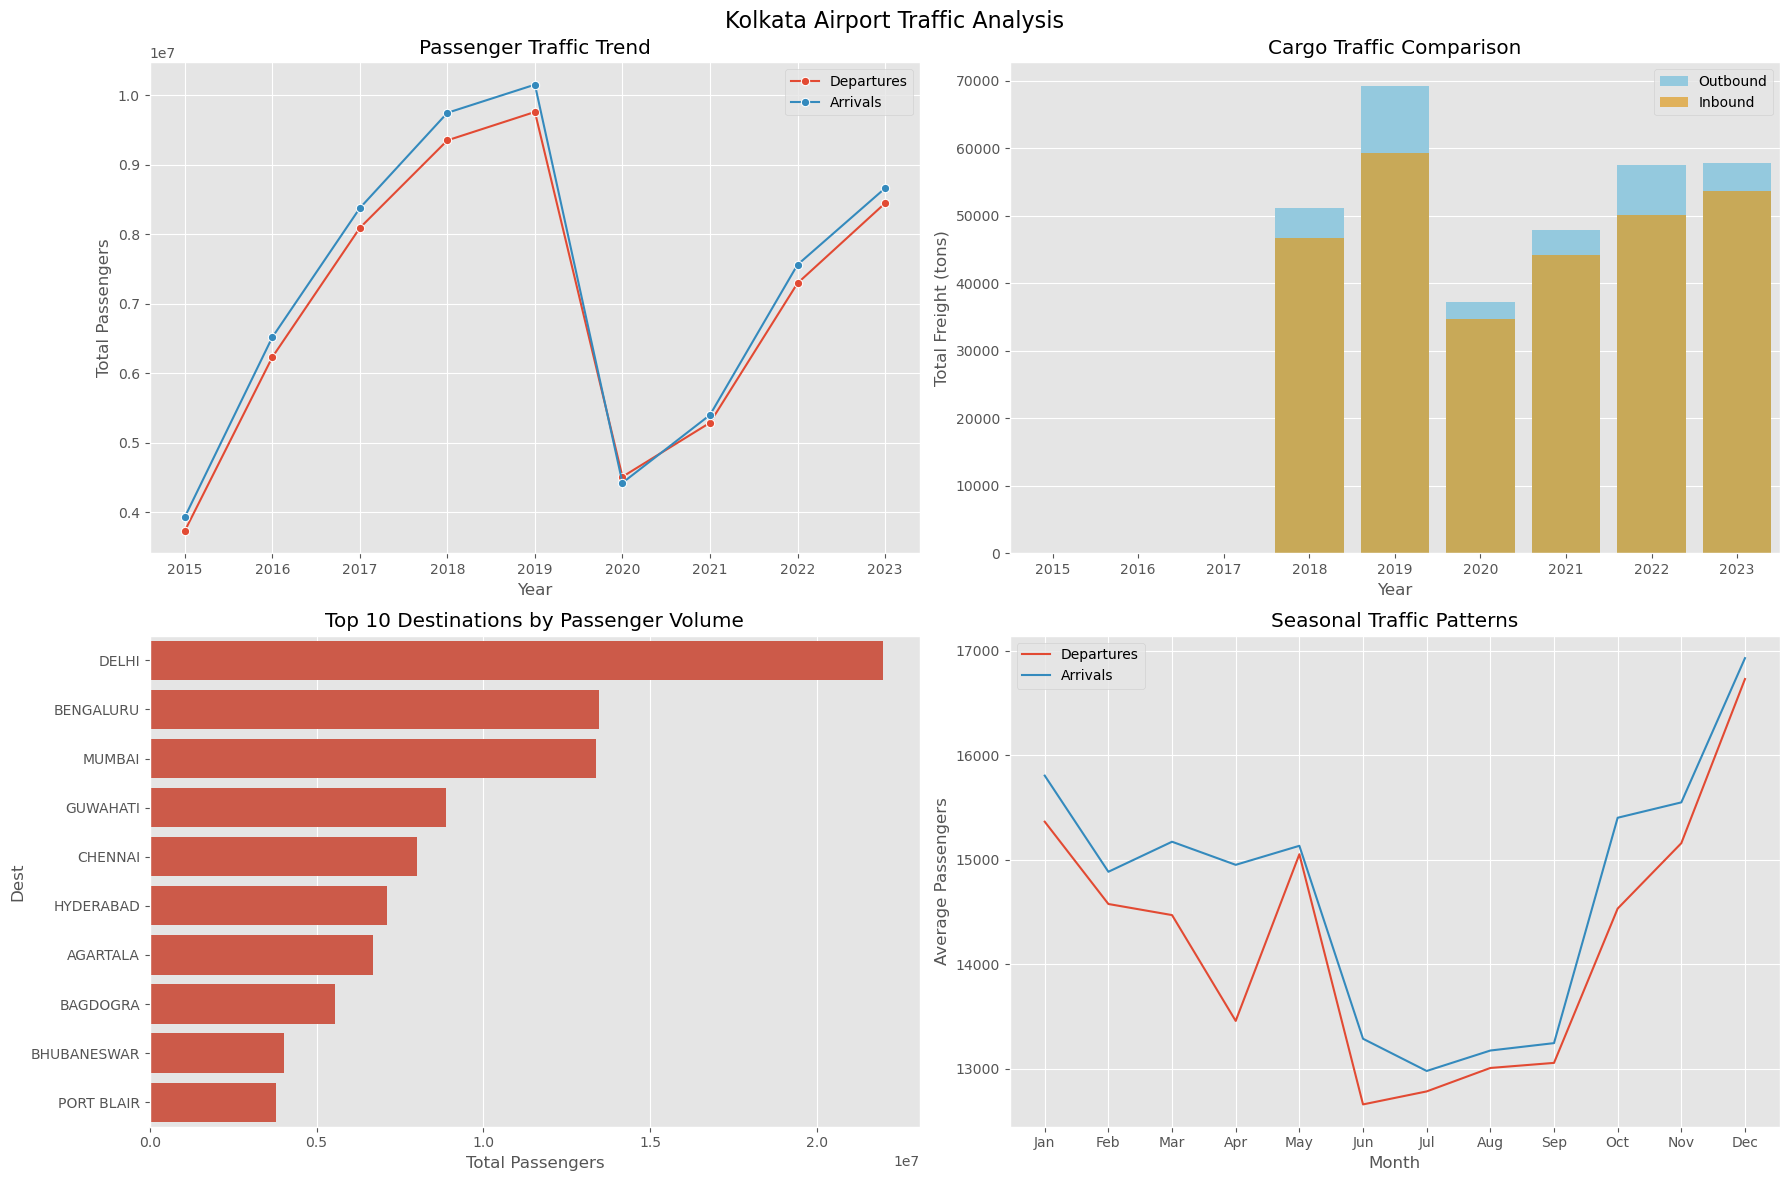

In [3]:
# -*- coding: utf-8 -*-
"""
COMPLETE FLIGHT DATA ANALYSIS TOOL
For Kolkata Airport - Multiple Specific Files
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# =============================================
# 1. CONFIGURATION - UPDATE THESE VALUES
# =============================================

# List ALL your data files with exact paths
FILE_PATHS = [
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2015.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2016.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2017.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2018.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2019.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2020.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2021.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2022.csv",
    r"D:\FDM downloads\Monthly Domestic Flights Data - 2023.csv"
]

# =============================================
# 2. DATA LOADING AND PROCESSING
# =============================================

def load_and_process_data():
    """Load and process all specified flight data files"""
    dfs = []
    
    print("⏳ Loading data files...")
    
    for file_path in FILE_PATHS:
        try:
            # Read with flexible encoding
            try:
                df = pd.read_csv(file_path, encoding='utf-8')
            except:
                df = pd.read_csv(file_path, encoding='latin1')
            
            # Standardize column names (strip whitespace and capitalize first letters)
            df.columns = [col.strip().title() for col in df.columns]
            
            dfs.append(df)
            print(f"✓ {Path(file_path).name} ({len(df)} records)")
            
        except Exception as e:
            print(f"✗ Error loading {Path(file_path).name}: {str(e)}")
            continue
    
    if not dfs:
        raise ValueError("❌ No data files could be loaded")
    
    combined_df = pd.concat(dfs, ignore_index=True, sort=False)
    print(f"\n✅ Successfully loaded {len(combined_df):,} total records")
    
    # Display column names for verification
    print("\nColumns in your data:")
    print(combined_df.columns.tolist())
    
    return combined_df

def clean_data(df):
    """Clean and prepare the combined dataset"""
    print("\n🧹 Cleaning data...")
    
    # Standardize column names to match your exact format
    column_mapping = {
        'Year': 'Year',
        'Month': 'Month',
        'Origin': 'Origin',
        'Dest': 'Dest',
        'Pax From Origin': 'Pax_From_Origin',
        'Pax To Origin': 'Pax_To_Origin',
        'Freight From Origin': 'Freight_From_Origin',
        'Frieght To Origin': 'Freight_To_Origin',
        'Mail From Origin': 'Mail_From_Origin',
        'Mail To Origin': 'Mail_To_Origin'
    }
    
    df = df.rename(columns=column_mapping)
    
    # Filter for Kolkata flights only
    df = df[df['Origin'].str.strip().str.upper() == 'KOLKATA']
    
    # Convert month to numeric if needed
    month_map = {
        'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
        'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
    }
    
    if df['Month'].dtype == 'object':
        df['Month'] = df['Month'].str.strip().str.upper().replace(month_map).astype(int)
    
    # Create datetime index
    df['Date'] = pd.to_datetime(
        df['Year'].astype(str) + '-' + df['Month'].astype(str),
        format='%Y-%m',
        errors='coerce'
    )
    
    # Calculate derived metrics
    df['Passenger_Imbalance'] = df['Pax_To_Origin'] - df['Pax_From_Origin']
    df['Freight_Imbalance'] = df['Freight_To_Origin'] - df['Freight_From_Origin']
    df['Total_Pax'] = df['Pax_From_Origin'] + df['Pax_To_Origin']
    df['Total_Freight'] = df['Freight_From_Origin'] + df['Freight_To_Origin']
    
    # Drop rows with invalid dates
    df = df.dropna(subset=['Date'])
    
    print(f"🔄 Cleaned dataset contains {len(df):,} records")
    return df

# =============================================
# 3. ANALYSIS AND VISUALIZATION
# =============================================

def analyze_and_visualize(df):
    """Perform analysis and create visualizations"""
    print("\n📊 Analyzing data...")
    
    # Create output directory
    os.makedirs('flight_analysis_output', exist_ok=True)
    
    # 1. Annual Trends
    annual_trends = df.groupby('Year').agg({
        'Pax_From_Origin': 'sum',
        'Pax_To_Origin': 'sum',
        'Freight_From_Origin': 'sum',
        'Freight_To_Origin': 'sum',
        'Passenger_Imbalance': 'mean'
    }).reset_index()
    
    # 2. Top Routes
    top_routes = df.groupby('Dest').agg({
        'Total_Pax': 'sum',
        'Total_Freight': 'sum'
    }).sort_values('Total_Pax', ascending=False).head(10)
    
    # 3. Seasonal Patterns
    monthly_patterns = df.groupby('Month').agg({
        'Pax_From_Origin': 'mean',
        'Pax_To_Origin': 'mean'
    }).reset_index()
    
    # ======================
    # VISUALIZATIONS
    # ======================
    plt.figure(figsize=(18, 12))
    plt.suptitle('Kolkata Airport Traffic Analysis', fontsize=16)
    
    # Plot 1: Passenger Growth
    plt.subplot(2, 2, 1)
    sns.lineplot(data=annual_trends, x='Year', y='Pax_From_Origin', 
                 label='Departures', marker='o')
    sns.lineplot(data=annual_trends, x='Year', y='Pax_To_Origin', 
                 label='Arrivals', marker='o')
    plt.title('Passenger Traffic Trend')
    plt.ylabel('Total Passengers')
    plt.grid(True)
    
    # Plot 2: Cargo Analysis
    plt.subplot(2, 2, 2)
    sns.barplot(data=annual_trends, x='Year', y='Freight_From_Origin', 
                color='skyblue', label='Outbound')
    sns.barplot(data=annual_trends, x='Year', y='Freight_To_Origin', 
                color='orange', label='Inbound', alpha=0.7)
    plt.title('Cargo Traffic Comparison')
    plt.ylabel('Total Freight (tons)')
    plt.legend()
    
    # Plot 3: Top Destinations
    plt.subplot(2, 2, 3)
    sns.barplot(data=top_routes.reset_index(), y='Dest', x='Total_Pax')
    plt.title('Top 10 Destinations by Passenger Volume')
    plt.xlabel('Total Passengers')
    
    # Plot 4: Seasonal Patterns
    plt.subplot(2, 2, 4)
    sns.lineplot(data=monthly_patterns, x='Month', y='Pax_From_Origin', 
                 label='Departures')
    sns.lineplot(data=monthly_patterns, x='Month', y='Pax_To_Origin', 
                 label='Arrivals')
    plt.title('Seasonal Traffic Patterns')
    plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.ylabel('Average Passengers')
    
    plt.tight_layout()
    plt.savefig('flight_analysis_output/kolkata_analysis.png', dpi=300)
    print("\n💾 Saved visualization: flight_analysis_output/kolkata_analysis.png")
    
    # ======================
    # STATISTICAL SUMMARY
    # ======================
    print("\n📈 Statistical Summary:")
    stats = df.groupby('Year').agg({
        'Pax_From_Origin': ['sum', 'mean', 'max', 'std'],
        'Freight_From_Origin': ['sum', 'mean'],
        'Passenger_Imbalance': ['mean', 'std']
    })
    print(stats)
    
    # Save results
    df.to_csv('flight_analysis_output/processed_flight_data.csv', index=False)
    stats.to_csv('flight_analysis_output/statistical_summary.csv')
    print("\n💾 Saved processed data to flight_analysis_output/ folder")

# =============================================
# 4. MAIN EXECUTION
# =============================================

if __name__ == "__main__":
    print("\n" + "="*50)
    print("KOLKATA AIRPORT FLIGHT DATA ANALYSIS")
    print("="*50 + "\n")
    
    # Step 1: Load data
    flight_df = load_and_process_data()
    
    # Step 2: Clean data
    cleaned_df = clean_data(flight_df)
    
    # Step 3: Analyze and visualize
    analyze_and_visualize(cleaned_df)
    
    print("\n" + "="*50)
    print("ANALYSIS COMPLETE! Check the flight_analysis_output folder")
    print("="*50 + "\n")
